In [1]:
import vbi
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from helpers import plot_ts_pxx_sl
from vbi.models.cpp.sl import SL_sdde

In [2]:
seed = 2
np.random.seed(seed)

In [3]:
LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [4]:
ds = vbi.Load_Data_Sample(nn=84)
weights = ds.get_weights(normalize=True)
distances = ds.get_lengths() / 1000  # [m]
nn = weights.shape[0]

In [5]:
params = {
    "G": 1000.0,
    "a": -5.0,
    "dt": 1e-4,
    "weights": weights,
    "distances": distances,  # [m]
    "velocity": 6.0,         # [m/s]
    "omega": 40*2*np.pi * np.ones(nn),
    'sigma_r': 1e-4,              # noise strength
    'sigma_v': 1e-4,              # noise strength
    "record_step": 2,
    "t_initial": 0.0,
    "t_transition": 2.0,
    "t_end": 10.0,
    "seed": 2,
}

In [6]:
obj = SL_sdde(params)
data = obj.run()

fmax = 2.44140625 Hz, Pxx = 6.23417197856066e-14


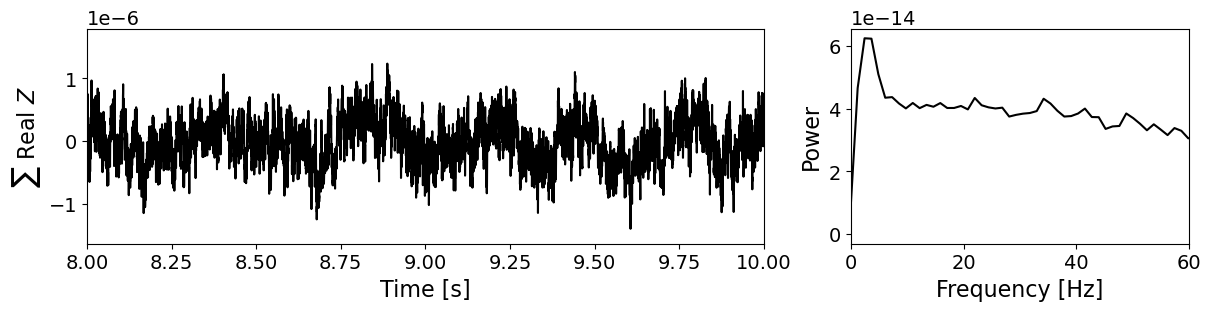

In [7]:
plot_ts_pxx_sl(data, params, color="k")
plt.show()